In [2]:
import os
import cv2
import time
import matplotlib.pyplot as plt

In [3]:
video_dir = '/Users/wbarbour1/Downloads/ingest_session_00011/recording'

In [4]:
video_files = [os.path.join(video_dir, vf) for vf in os.listdir(video_dir)]
print(video_files)

['/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p1c5_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p2c2_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p3c0_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p1c3_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p2c4_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p1c4_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p2c3_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p3c1_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p1c2_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p2c5_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p3c4_00000.mp4', '/Users/wbarbour1/Downloads/ingest_session_00011/recording/record_p2c0_00000.mp4', '/U

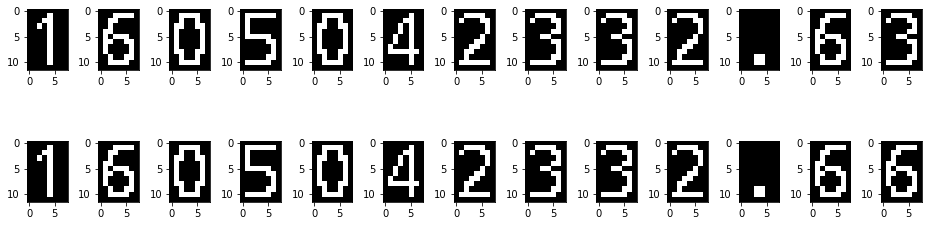

In [35]:
w = 8
h = 12
x0 = 10
y0 = 2
n = 13
video_file = video_files[0]
fi = [0, 1]
frames = []
try:
    cap = cv2.VideoCapture(video_file)
    assert cap.isOpened(), "Cannot open file \"{}\"".format(video_file)
    
    i = 0
    fi.sort()
    while i <= max(fi):
        ret, frame = cap.read()
        if i in fi:
            frames.append(frame)
        i += 1
        continue
    
    fig, axs = plt.subplots(len(fi), n, figsize=(n, 2*len(fi)))
    for i in range(len(fi)):
        frame = frames[i]
        tsimg = frame[0:y0+h, 0:x0+(n*w), :]
        tsgray = cv2.cvtColor(tsimg, cv2.COLOR_BGR2GRAY)
        ret, tsmask = cv2.threshold(tsgray, 127, 255, cv2.THRESH_BINARY)
        
        for j in range(n):
            if len(fi) == 1:
                ax = axs[j]
            else:
                ax = axs[i][j]
            
            dig = tsmask[y0:y0+h, x0+j*w:x0+(j+1)*w]
            ax.imshow(dig, 'gray')
    plt.tight_layout()
    plt.show()
except BaseException as e:
    print(e)
finally:
    cap.release()

In [4]:
video_file = video_files[0]
try:
    cap = cv2.VideoCapture(video_file)
    assert cap.isOpened(), "Cannot open file \"{}\"".format(video_file)

    # opens VideoWriter object for saving video file if necessary
    out = None
    if False:
        # open video_writer object
        frame_width = int(cap.get(3))
        frame_height = int(cap.get(4))
        out = cv2.VideoWriter(save_file,cv2.CAP_FFMPEG,cv2.VideoWriter_fourcc('H','2','6','4'), 30, (frame_width,frame_height))

    #main loop   
    start = time.time()
    frames = 0
    ret = None
    all_detections = []

    # get first frame
    ret, frame = cap.read()

    while cap.isOpened():
        if ret is True:
            #summary statistics
            frames += 1
            print("Frame {}: {:5.2f} fps".format(frames, frames / (time.time() - start)))

            if out is not None:
                out.write(im)

            # output frame if necessary
            if True:
                im = cv2.resize(frame, (1920, 1080))               
                cv2.imshow("frame", im)
                key = cv2.waitKey(1)
                if key & 0xFF == ord('q'):
                    break
            
            # get next frame or None
            ret, frame = cap.read()
            
        else:
            break
except BaseException as e:
    raise e
finally:
    try:
        cap.release()
    except:
        pass
    cv2.destroyAllWindows()

Frame 1:  5.01 fps
Frame 2:  1.29 fps
Frame 3:  1.58 fps
Frame 4:  2.04 fps
Frame 5:  2.45 fps
Frame 6:  2.85 fps
Frame 7:  3.23 fps
Frame 8:  3.59 fps
Frame 9:  3.94 fps
Frame 10:  4.29 fps
Frame 11:  4.60 fps
Frame 12:  4.93 fps
Frame 13:  5.22 fps
Frame 14:  5.51 fps
Frame 15:  5.77 fps
Frame 16:  6.04 fps
Frame 17:  6.30 fps
Frame 18:  6.22 fps
Frame 19:  6.45 fps
Frame 20:  6.68 fps
Frame 21:  6.90 fps
Frame 22:  7.10 fps
Frame 23:  7.28 fps
Frame 24:  7.49 fps
Frame 25:  7.69 fps
Frame 26:  7.89 fps
Frame 27:  8.08 fps
Frame 28:  8.26 fps
Frame 29:  8.44 fps
Frame 30:  8.62 fps
Frame 31:  8.73 fps
Frame 32:  8.91 fps
Frame 33:  9.06 fps
Frame 34:  9.22 fps
Frame 35:  9.37 fps
Frame 36:  9.52 fps
Frame 37:  9.67 fps
Frame 38:  9.82 fps
Frame 39:  9.96 fps
Frame 40: 10.08 fps
Frame 41: 10.19 fps
Frame 42: 10.30 fps
Frame 43: 10.38 fps
Frame 44: 10.51 fps
Frame 45: 10.64 fps
Frame 46: 10.77 fps
Frame 47: 10.84 fps
Frame 48: 10.95 fps
Frame 49: 11.07 fps
Frame 50: 11.18 fps
Frame 51: